In [2]:
from models import scalers
from data_cleaning import DataCleaner
from training import split_x_y, toa_data_nohold

import pandas as pd
import numpy as np
np.random.seed(10)

from matplotlib import pyplot as plt
%matplotlib inline

# Models
from lightgbm import LGBMRegressor
from sklearn.base import BaseEstimator
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor


2021-11-03 14:21:26.866097: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-03 14:21:26.866118: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-11-03 14:21:31.747765: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-03 14:21:31.747783: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-03 14:21:31.747794: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (n02.lan): /proc/driver/nvidia/version does not exist
2021-11-03 14:21:31.747927: I tensorflow/core/platform/cpu_feature_gu

In [5]:
# Setup

scaler = scalers["Robust"]

dep_var = "Log(Rmax)"

cleaner = DataCleaner(scaler, dep_var)
# data = toa_all_data(dep_var, cleaner)
# [(X, y)] = split_x_y(data, dep_var)
[(X, y), (test_X, test_y)] = toa_data_nohold(dep_var, cleaner)
X


TOP500_201311.xls
TOP500_201211.xls
TOP500_201406.xls
TOP500_201906.xls
TOP500_201206.xls
TOP500_202106.xlsx
TOP500_201806.xls
TOP500_201706.xls
TOP500_201606.xls
TOP500_201911.xls
TOP500_201306.xls
TOP500_201711.xls
TOP500_201111.xls
TOP500_201611.xls
TOP500_201506.xls
TOP500_201511.xls
TOP500_202006.xlsx
TOP500_201811.xls
TOP500_202011.xlsx
TOP500_201411.xls
Unknown processor: 'NEC', full name: 'NEC  3.200GHz' @ Earth Simulator, 2009
Unknown processor: 'NEC', full name: 'NEC  3.200GHz' @ Earth Simulator, 2009
Unknown processor: 'NEC', full name: 'NEC  3.200GHz' @ Earth Simulator, 2009
Unknown processor: 'NEC', full name: 'NEC  3.200GHz' @ Earth Simulator, 2009
Unknown processor: 'NEC', full name: 'NEC  3.20GHz' @ Earth Simulator, 2009
Unknown processor: 'Xeon EM64T', full name: 'Xeon EM64T  3.60GHz' @ Thunderbird, 2006
Filtered duplicates to go from 10000 rows to 2476


,Year,Processor Speed (MHz),Total Cores,Co-Processor Cores to Total Cores,x0_MPP,x0_Constellations,x1_AMD Zen-2 (Rome),x1_AMD Zen-3 (Milan),x1_Bulldozer,x1_CBEA,...,x1_SPARC64 VIIIfx,x1_SPARC64 XIfx,x1_SW-1,x1_SW-2,x1_SW-3,x1_SW26010,x1_SX-Aurora,x1_Unknown,x1_Vulcan,x1_Zen
3857,0.4,0.333333,0.125467,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4310,0.2,-1.333333,3.359276,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3471,0.4,-0.333333,0.496070,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43,-0.2,0.333333,0.460683,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2849,1.0,-0.333333,0.364566,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4919,1.2,-4.000000,37.312472,0.998993,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2430,-0.8,1.433333,-0.350817,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2684,1.4,-1.333333,1.811112,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
806,-1.0,7.333333,-0.470845,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
X.shape, X.columns

((2228, 51),
 Index(['Year', 'Processor Speed (MHz)', 'Total Cores',
        'Co-Processor Cores to Total Cores', 'x0_MPP', 'x0_Constellations',
        'x1_AMD Zen-2 (Rome)', 'x1_AMD Zen-3 (Milan)', 'x1_Bulldozer',
        'x1_CBEA', 'x1_IBM A2', 'x1_Intel Broadwell', 'x1_Intel Cascade lake',
        'x1_Intel Core', 'x1_Intel Haswell', 'x1_Intel Ice Lake',
        'x1_Intel IvyBridge', 'x1_Intel Nehalem', 'x1_Intel SandyBridge',
        'x1_Intel Skylake', 'x1_Intel Westmere', 'x1_K10', 'x1_K8',
        'x1_Knights Landing', 'x1_Many Integrated Cores', 'x1_Montecito',
        'x1_POWER5', 'x1_POWER6', 'x1_POWER7', 'x1_POWER8', 'x1_POWER8+',
        'x1_POWER9', 'x1_POWER10', 'x1_PowerPC 4xx', 'x1_PowerPC 6xx',
        'x1_PowerPC 7xx', 'x1_PowerPC 970', 'x1_Piledriver', 'x1_SBSA',
        'x1_SPARC64 IXfx', 'x1_SPARC64 VII', 'x1_SPARC64 VIIIfx',
        'x1_SPARC64 XIfx', 'x1_SW-1', 'x1_SW-2', 'x1_SW-3', 'x1_SW26010',
        'x1_SX-Aurora', 'x1_Unknown', 'x1_Vulcan', 'x1_Zen'],
    

In [52]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()

params_grid = {
    "n_neighbors": list(range(1, 10, 2)),
    "weights": ["uniform", "distance"],
    "p": [1, 2, 3, 4]
}


In [22]:
from sklearn.svm import SVR

model = SVR()

params_grid = [
    {
        "kernel": ["rbf"],
        "gamma": ["auto", "scale", *np.logspace(-9, 3, 10)],
        "C": [175, 160, 155, 150, 140, 125],
        "epsilon": [0.25, 0.2, 0.1, 0.05],
        "cache_size": [1000]
    }
]


In [5]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

params_grid = {
    "n_estimators": [10, 100, 1000, 2000, 3000, 4000],
    "max_features": ["auto", "sqrt", "log2"],
    "max_depth": [None, *range(5, 10, 2)],
}


In [23]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

gs = GridSearchCV(model, params_grid, scoring="r2", n_jobs=64, verbose=2)
# gs = RandomizedSearchCV(model, params_grid, scoring="r2", n_jobs=64, verbose=2)
gs.fit(X, y)

results = pd.DataFrame(gs.cv_results_)
gs.best_params_, gs.best_score_, results.columns


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END C=175, cache_size=1000, epsilon=0.25, gamma=scale, kernel=rbf; total time=   0.6s
[CV] END C=175, cache_size=1000, epsilon=0.25, gamma=scale, kernel=rbf; total time=   0.7s[CV] END C=175, cache_size=1000, epsilon=0.25, gamma=1e-09, kernel=rbf; total time=   0.6s
[CV] END C=175, cache_size=1000, epsilon=0.25, gamma=scale, kernel=rbf; total time=   0.7s

[CV] END C=175, cache_size=1000, epsilon=0.25, gamma=auto, kernel=rbf; total time=   0.7s
[CV] END C=175, cache_size=1000, epsilon=0.25, gamma=1e-09, kernel=rbf; total time=   0.7s[CV] END C=175, cache_size=1000, epsilon=0.25, gamma=scale, kernel=rbf; total time=   0.7s

[CV] END C=175, cache_size=1000, epsilon=0.25, gamma=1e-09, kernel=rbf; total time=   0.7s
[CV] END C=175, cache_size=1000, epsilon=0.25, gamma=1e-09, kernel=rbf; total time=   0.8s
[CV] END C=175, cache_size=1000, epsilon=0.25, gamma=auto, kernel=rbf; total time=   0.9s
[CV] END C=175, cache_size=1

({'C': 140,
  'cache_size': 1000,
  'epsilon': 0.2,
  'gamma': 'auto',
  'kernel': 'rbf'},
 0.920330864892839,
 Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
        'param_C', 'param_cache_size', 'param_epsilon', 'param_gamma',
        'param_kernel', 'params', 'split0_test_score', 'split1_test_score',
        'split2_test_score', 'split3_test_score', 'split4_test_score',
        'mean_test_score', 'std_test_score', 'rank_test_score'],
       dtype='object'))

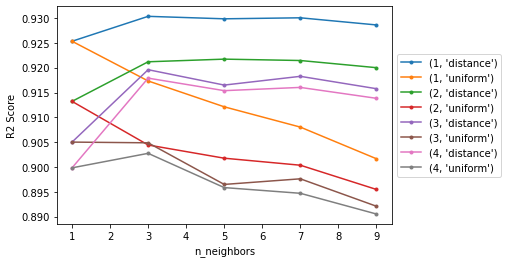

In [59]:
# KNeighborsRegressor graph
fig, plot = plt.subplots()
for p in results.groupby(["param_p", "param_weights"], dropna=False):
    title, res = p
    plot.plot(res["param_n_neighbors"], res["mean_test_score"], linestyle="-", marker=".", label=title)
    plot.xlabel("n_neighbors")
    plot.ylabel("R2 Score")
    plot.legend(loc="center left", bbox_to_anchor=(1, 0.5))


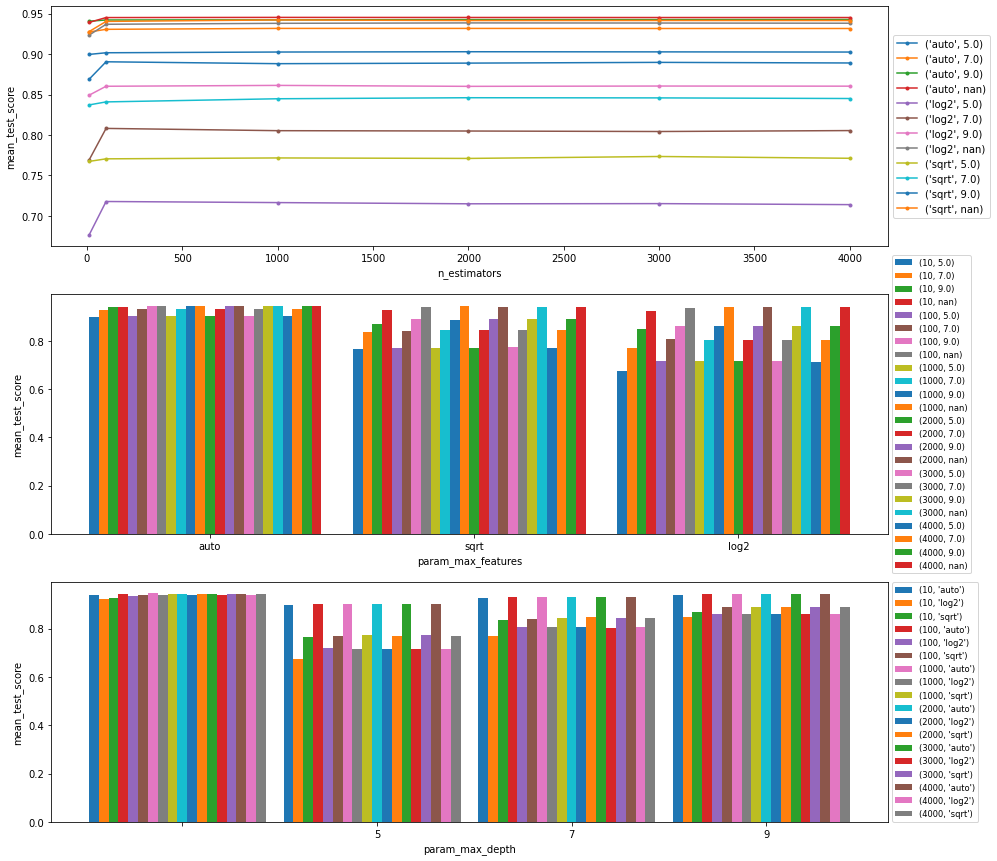

In [49]:
# RandomForestRegressor graphs
fig, axis = plt.subplots(3, 1, figsize=(15, 15))

# n_estimators line graph
plot = axis[0]
plot.set_xlabel("n_estimators")
plot.set_ylabel("mean_test_score")
for p in results.groupby(["param_max_features", "param_max_depth"], dropna=False):
    title, res = p
    plot.plot(res["param_n_estimators"], res["mean_test_score"],
              linestyle="-", marker=".", label=title)
plot.legend(loc="center left", bbox_to_anchor=(1, 0.5))


def bar_graph(plot, df, original_df, x_col_name, y_col_name):
    labels = original_df[x_col_name].unique()
    x = np.arange(len(labels))
    num_per_tick = len(original_df) // len(labels)
    width = (1 / num_per_tick) - 0.005

    plot.set_xticks(x)
    plot.set_xticklabels(labels)
    plot.set_xlabel(x_col_name)
    plot.set_ylabel(y_col_name)

    for i, p in enumerate(df):
        title, res = p
        bar_slot = i - (num_per_tick / 2)
        bar_x = x + width*bar_slot
        plot.bar(bar_x, res["mean_test_score"], width, label=title)
    plot.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize="small")


# max_features bar graph
res_est_depth = results.groupby(["param_n_estimators", "param_max_depth"], dropna=False)
plot = axis[1]
bar_graph(plot, res_est_depth, results, "param_max_features", "mean_test_score")

# max_depth line graph
plot = axis[2]
res_est_feat = results.groupby(["param_n_estimators", "param_max_features"], dropna=False)
bar_graph(plot, res_est_feat, results, "param_max_depth", "mean_test_score")


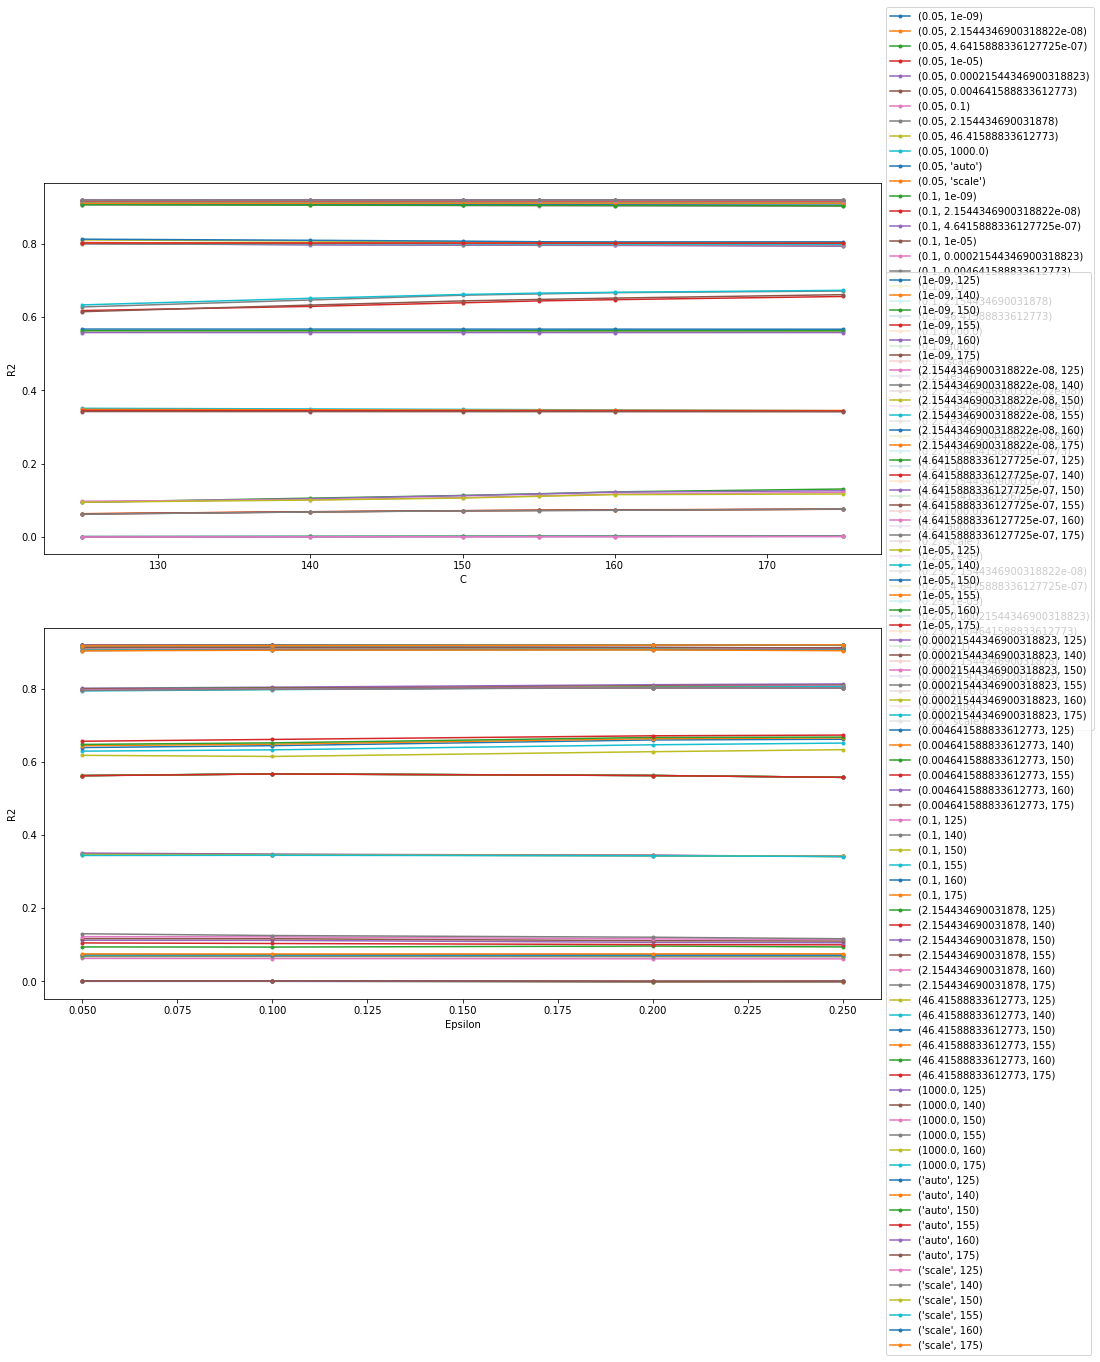

In [24]:
# SVR graphs
fig, axes = plt.subplots(2, 1, figsize=(15, 15))

plot = axes[0]
plot.set_xlabel("C")
plot.set_ylabel("R2")
for p in results.groupby(["param_epsilon", "param_gamma"], dropna=False):
    title, res = p
    plot.plot(res["param_C"], res["mean_test_score"], linestyle="-", marker=".", label=title)
    plot.legend(loc="center left", bbox_to_anchor=(1, 0.5))

plot = axes[1]
plot.set_xlabel("Epsilon")
plot.set_ylabel("R2")
for p in results.groupby(["param_gamma", "param_C"], dropna=False):
    title, res = p
    plot.plot(res["param_epsilon"], res["mean_test_score"], linestyle="-", marker=".", label=title)
    plot.legend(loc="center left", bbox_to_anchor=(1, 0.5))

In [25]:
from datetime import datetime
import pathlib

model_name = type(model).__name__
scaler_name = type(scaler).__name__

now = datetime.now()
dt_string = now.strftime(r"%m-%d-%YT%I-%M-%S%p")

identifier = f"{model_name}_{scaler_name}_{dt_string}"
out_dir = pathlib.Path("out")
csv_path = out_dir / (identifier + ".csv")
img_path = out_dir / (identifier + ".png")

results.to_csv(csv_path)
fig.set_facecolor((1, 1, 1, 1))
fig.savefig(img_path)
